In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import pandas as pd
flujos = pd.read_csv(os.path.join("tfm_ml/flujofit.csv"))
flujos.info()
flujos.head()
flujos = flujos.drop(['#:unix_secs','unix_nsecs','exaddr', 'engine_type', 'engine_id','src_mask', 'dst_mask', 'src_as', 'dst_as','sysuptime','first', 'last', 'srcaddr', 'dstaddr', 'nexthop'],axis=1)
flujos.info()
flujos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #:unix_secs  19998 non-null  int64 
 1   unix_nsecs   19998 non-null  int64 
 2   sysuptime    19998 non-null  int64 
 3   exaddr       19998 non-null  object
 4   dpkts        19998 non-null  int64 
 5   doctets      19998 non-null  int64 
 6   first        19998 non-null  int64 
 7   last         19998 non-null  int64 
 8   engine_type  19998 non-null  int64 
 9   engine_id    19998 non-null  int64 
 10  srcaddr      19998 non-null  object
 11  dstaddr      19998 non-null  object
 12  nexthop      19998 non-null  object
 13  input        19998 non-null  int64 
 14  output       19998 non-null  int64 
 15  srcport      19998 non-null  int64 
 16  dstport      19998 non-null  int64 
 17  prot         19998 non-null  int64 
 18  tos          19998 non-null  int64 
 19  tcp_flags    19998 non-nu

,dpkts,doctets,input,output,srcport,dstport,prot,tos,tcp_flags,label
0,1,60,996,996,587,36220,6,0,18,1
1,19,2675,996,996,45058,587,6,0,27,1
2,19,2675,996,996,36190,587,6,0,27,1
3,20,6599,996,996,917,36190,6,0,25,1
4,1,60,996,996,587,45106,6,0,18,1


In [2]:
for col in flujos.columns:
    if flujos[col].min() == flujos[col].max():
        flujos = flujos.drop(col, axis=1)
flujos.info()
flujos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dpkts      19998 non-null  int64
 1   doctets    19998 non-null  int64
 2   input      19998 non-null  int64
 3   output     19998 non-null  int64
 4   srcport    19998 non-null  int64
 5   dstport    19998 non-null  int64
 6   prot       19998 non-null  int64
 7   tos        19998 non-null  int64
 8   tcp_flags  19998 non-null  int64
 9   label      19998 non-null  int64
dtypes: int64(10)
memory usage: 1.5 MB


,dpkts,doctets,input,output,srcport,dstport,prot,tos,tcp_flags,label
0,1,60,996,996,587,36220,6,0,18,1
1,19,2675,996,996,45058,587,6,0,27,1
2,19,2675,996,996,36190,587,6,0,27,1
3,20,6599,996,996,917,36190,6,0,25,1
4,1,60,996,996,587,45106,6,0,18,1


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una copia de las columnas sin la columna 'label'
features = flujos.drop('label', axis=1)
# Creamos el escalador
scaler = MinMaxScaler()
# Ajustamos el escalador a nuestras características y luego transformamos los datos
scaled_features = scaler.fit_transform(features)


# Volvemos a convertir en un DataFrame
scaled_flujos = pd.DataFrame(scaled_features, columns=features.columns)

# Agregamos la columna 'label' al DataFrame escalado
scaled_flujos['label'] = flujos['label'].values


scaled_flujos.info()
scaled_flujos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dpkts      19998 non-null  float64
 1   doctets    19998 non-null  float64
 2   input      19998 non-null  float64
 3   output     19998 non-null  float64
 4   srcport    19998 non-null  float64
 5   dstport    19998 non-null  float64
 6   prot       19998 non-null  float64
 7   tos        19998 non-null  float64
 8   tcp_flags  19998 non-null  float64
 9   label      19998 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


,dpkts,doctets,input,output,srcport,dstport,prot,tos,tcp_flags,label
0,0.000000,0.000007,0.015078,1.0,0.009624,0.560425,0.3125,0.0,0.580645,1
1,0.008604,0.000921,0.015078,1.0,0.738728,0.008275,0.3125,0.0,0.870968,1
2,0.008604,0.000921,0.015078,1.0,0.593337,0.008275,0.3125,0.0,0.870968,1
3,0.009082,0.002292,0.015078,1.0,0.015034,0.559960,0.3125,0.0,0.806452,1
4,0.000000,0.000007,0.015078,1.0,0.009624,0.698117,0.3125,0.0,0.580645,1


In [4]:
#Caso inicial
#Se van a utilizar los flujos y la reducción propuesta por el paper.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Seleccionamos las características y las etiquetas
X = scaled_flujos.drop('label', axis=1)
y = scaled_flujos['label']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos una lista con los modelos que queremos probar
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('MLP', MLPClassifier(max_iter=30000))
]

# Entrenamos el modelo y lo evaluamos
for name, model in models:
    model.fit(X_train, y_train)  # Entrenamos el modelo
    predictions = model.predict(X_test)  # Realizamos predicciones en el conjunto de prueba
    accuracy = accuracy_score(y_test, predictions)  # Calculamos la precisión
    print(f'{name} Accuracy: {accuracy * 100:.2f}%') #imprimos por pantalla los resultados de precision

Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%
SVM Accuracy: 100.00%
KNN Accuracy: 100.00%
MLP Accuracy: 100.00%


In [5]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions)
print(f'Precision: {precision}')

Precision: 1.0


In [6]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print(f'Recall: {recall}')

Recall: 1.0


In [7]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, predictions, average='macro')
print(f'F1 Score: {f1score}')

F1 Score: 1.0


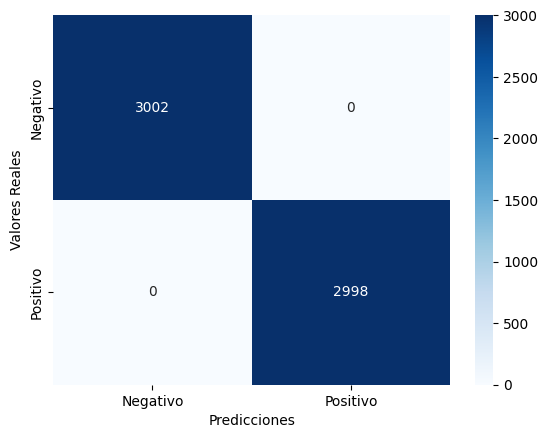

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predictions)
# Mostrar la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

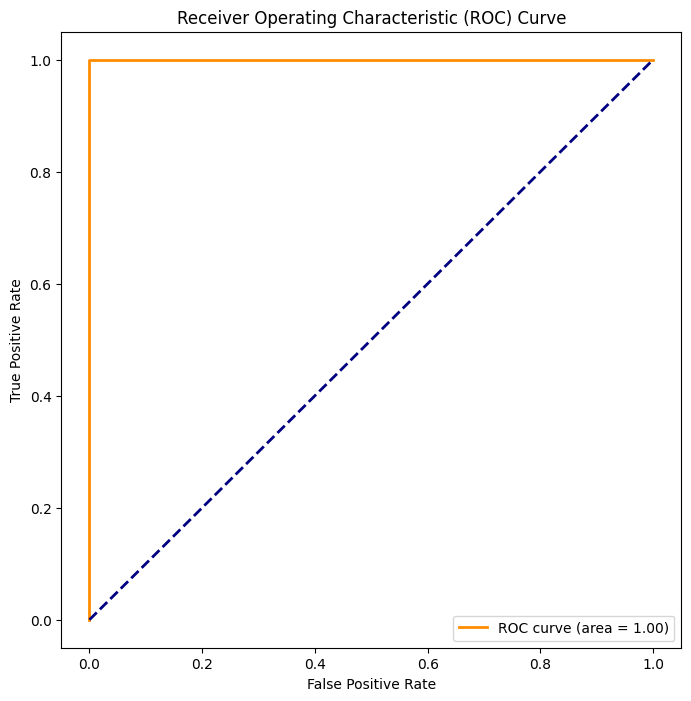

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [10]:
# vamos con el caso de prueba
flujos2 = pd.read_csv(os.path.join("tfm_ml/netflow_prueba2.csv"))
flujos2.info()
flujos2.head()
flujos2 = flujos2.drop(['#:unix_secs','unix_nsecs','exaddr', 'engine_type', 'engine_id','src_mask', 'dst_mask', 'src_as', 'dst_as','sysuptime','first', 'last', 'srcaddr', 'dstaddr', 'nexthop'],axis=1)
flujos2.info()
flujos2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #:unix_secs  1174 non-null   int64 
 1   unix_nsecs   1174 non-null   int64 
 2   sysuptime    1174 non-null   int64 
 3   exaddr       1174 non-null   object
 4   dpkts        1174 non-null   int64 
 5   doctets      1174 non-null   int64 
 6   first        1174 non-null   int64 
 7   last         1174 non-null   int64 
 8   engine_type  1174 non-null   int64 
 9   engine_id    1174 non-null   int64 
 10  srcaddr      1174 non-null   object
 11  dstaddr      1174 non-null   object
 12  nexthop      1174 non-null   object
 13  input        1174 non-null   int64 
 14  output       1174 non-null   int64 
 15  srcport      1174 non-null   int64 
 16  dstport      1174 non-null   int64 
 17  prot         1174 non-null   int64 
 18  tos          1174 non-null   int64 
 19  tcp_flags    1174 non-null 

,dpkts,doctets,input,output,srcport,dstport,prot,tos,tcp_flags,label
0,1,60,230,230,47118,22,6,0,2,1
1,1,88,65535,230,0,1281,1,192,0,1
2,2,176,65535,230,0,1281,1,192,0,1
3,1,60,230,230,25,43088,6,0,18,1
4,1,60,230,230,25,59028,6,0,18,1


In [11]:
for col in flujos2.columns:
    if flujos2[col].min() == flujos2[col].max():
        flujos2 = flujos2.drop(col, axis=1)
flujos2.info()
flujos2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dpkts      1174 non-null   int64
 1   doctets    1174 non-null   int64
 2   input      1174 non-null   int64
 3   output     1174 non-null   int64
 4   srcport    1174 non-null   int64
 5   dstport    1174 non-null   int64
 6   prot       1174 non-null   int64
 7   tos        1174 non-null   int64
 8   tcp_flags  1174 non-null   int64
 9   label      1174 non-null   int64
dtypes: int64(10)
memory usage: 91.8 KB


,dpkts,doctets,input,output,srcport,dstport,prot,tos,tcp_flags,label
0,1,60,230,230,47118,22,6,0,2,1
1,1,88,65535,230,0,1281,1,192,0,1
2,2,176,65535,230,0,1281,1,192,0,1
3,1,60,230,230,25,43088,6,0,18,1
4,1,60,230,230,25,59028,6,0,18,1


In [12]:
# Creamos una copia de las columnas sin la columna 'label'
features2 = flujos2.drop('label', axis=1)
# Creamos el escalador
scaler = MinMaxScaler()
# Ajustamos el escalador a nuestras características y luego transformamos los datos
scaled_features2 = scaler.fit_transform(features2)


# Volvemos a convertir en un DataFrame
scaled_flujos2 = pd.DataFrame(scaled_features2, columns=features2.columns)

# Agregamos la columna 'label' al DataFrame escalado
scaled_flujos2['label'] = flujos2['label'].values


scaled_flujos2.info()
scaled_flujos2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dpkts      1174 non-null   float64
 1   doctets    1174 non-null   float64
 2   input      1174 non-null   float64
 3   output     1174 non-null   float64
 4   srcport    1174 non-null   float64
 5   dstport    1174 non-null   float64
 6   prot       1174 non-null   float64
 7   tos        1174 non-null   float64
 8   tcp_flags  1174 non-null   float64
 9   label      1174 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 91.8 KB


,dpkts,doctets,input,output,srcport,dstport,prot,tos,tcp_flags,label
0,0.000000,0.000000,0.003388,0.003388,0.772958,0.000000,0.3125,0.0,0.066667,1
1,0.000000,0.000014,1.000000,0.003388,0.000000,0.020661,0.0000,1.0,0.000000,1
2,0.001006,0.000057,1.000000,0.003388,0.000000,0.020661,0.0000,1.0,0.000000,1
3,0.000000,0.000000,0.003388,0.003388,0.000410,0.706741,0.3125,0.0,0.600000,1
4,0.000000,0.000000,0.003388,0.003388,0.000410,0.968327,0.3125,0.0,0.600000,1


In [13]:
X_prueba2 = scaled_flujos2.drop('label', axis=1)
y_prueba2 = scaled_flujos2['label']
for name, model in models:
    predictions2 = model.predict(X_prueba2)  # Realizamos predicciones en el conjunto de prueba
    accuracy2 = accuracy_score(y_prueba2, predictions2)  # Calculamos la precisión
    print(f'{name} Accuracy: {accuracy2 * 100:.2f}%') #imprimos por pantalla los resultados de precision

Decision Tree Accuracy: 50.68%
Random Forest Accuracy: 50.00%
SVM Accuracy: 50.68%
KNN Accuracy: 53.75%
MLP Accuracy: 54.43%


In [15]:
from sklearn.metrics import precision_score
precision2 = precision_score(y_prueba2, predictions2)
print(f'Precision: {precision2}')

Precision: 1.0


In [16]:
from sklearn.metrics import recall_score
recall2 = recall_score(y_prueba2, predictions2)
print(f'Recall: {recall2}')

Recall: 0.08858603066439523


In [17]:
from sklearn.metrics import f1_score
f1score2 = f1_score(y_prueba2, predictions2, average='macro')
print(f'F1 Score: {f1score2}')

F1 Score: 0.4248528685931335


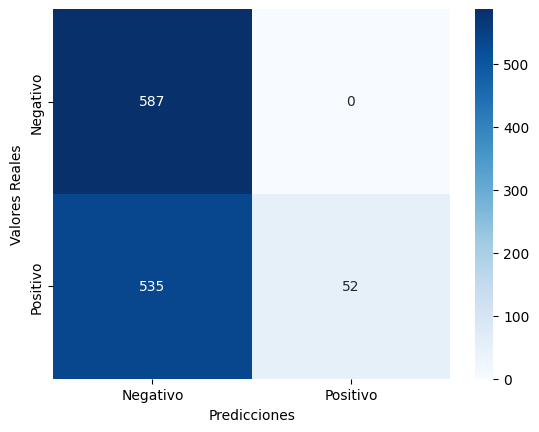

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix2 = confusion_matrix(y_prueba2, predictions2)
# Mostrar la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

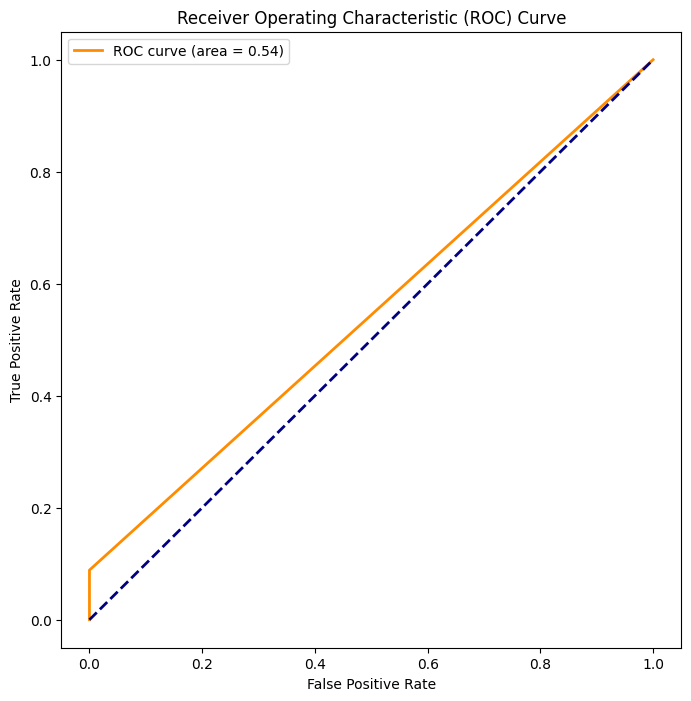

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr2, tpr2, thresholds2 = roc_curve(y_prueba2, predictions2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 8))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()